In [60]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

In [61]:
# K : K Armed Bandit
K = 10
# stepSize : Number of Steps
stepSize = 1000
#alpha : constant value of step size
alpha = 0.1
#Runs : Number of runs
Runs = 2000

In [64]:
def returnRewardTimeStepMean(estimatedValueFunctionOriginal, epsilon, nonStationary, meanAverage):
    
    currentTime = time.time()
    rewardTimeStep = np.zeros(stepSize)
    optimalActionStep = np.zeros(stepSize)
    for runs in range(Runs):
        trueValueFunction = np.random.randn(K)
        estimatedValueFunction = np.copy(estimatedValueFunctionOriginal)
        alphaAction = np.zeros(K)
        for i in range(stepSize):
            epsilonProbability = random.uniform(0,1)
            
           
            if epsilonProbability >= epsilon :
                actionIndex = np.argmax(estimatedValueFunction)
            else :
                actionIndex = random.randint(0,K-1)
                
                
            mean, sigma = trueValueFunction[actionIndex], 1
            actionReward = np.random.normal(mean, sigma, 1)
            
            bestTrueAction = np.argmax(trueValueFunction)
            if actionIndex == bestTrueAction:
                optimalActionStep[i] += 1
            
            rewardTimeStep[i] += actionReward
            
            alphaAction[actionIndex] += 1
            
            if meanAverage == True:
                constant = 1/alphaAction[actionIndex]
            else:
                constant = alpha
                
            estimatedValueFunction[actionIndex] += constant*(actionReward - estimatedValueFunction[actionIndex])
        
            if nonStationary == True:
                incrementalUpdate = np.random.normal(0,0.01,10)
                trueValueFunction += incrementalUpdate
    
    rewardTimeStepMean = rewardTimeStep/Runs
    optimalActionStep /= Runs
    optimalActionStep *= 100

    print("Time taken : ", time.time() - currentTime)
    return rewardTimeStepMean, optimalActionStep

## <span style='color:Black'> Stationary Problem Optimistic </span>

In [65]:
estimatedValueFunction = np.zeros(K) + 5
nonStationary = False
epsilon = 0
meanAverage = False
rewardTimeStepMean_1, optimalActionStep_1 = returnRewardTimeStepMean(estimatedValueFunction, epsilon, nonStationary, meanAverage)

Time taken :  41.48854303359985


## <span style='color:Black'> Stationary Problem Epsilon Greedy </span>

In [66]:
# trueValueFunction = np.random.randn(K)
estimatedValueFunction = np.zeros(K)
nonStationary = False
epsilon = 0.1
meanAverage = False
rewardTimeStepMean_2, optimalActionStep_2 = returnRewardTimeStepMean(estimatedValueFunction, epsilon, nonStationary, meanAverage)

Time taken :  43.28706407546997


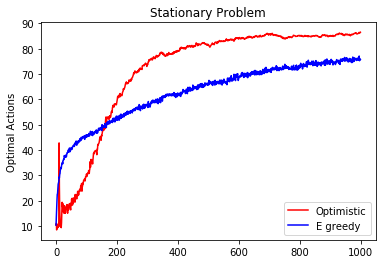

In [67]:
plt.figure()
plt.title("Stationary Problem")
plt.ylabel("Optimal Actions")
plt.plot(optimalActionStep_1, 'r', label='Optimistic')
plt.plot(optimalActionStep_2, 'b', label='E greedy')
plt.legend(loc='lower right')
plt.show()

## <span style='color:Black'> Non Stationary Problem Optimistic </span>

In [68]:
# trueValueFunction = np.random.randn(K)
estimatedValueFunction = np.zeros(K) + 5
nonStationary = True
epsilon = 0
meanAverage = False
rewardTimeStepMean_3, optimalActionStep_3 = returnRewardTimeStepMean(estimatedValueFunction, epsilon, nonStationary, meanAverage)

Time taken :  59.805016040802


## <span style='color:Black'> Non Stationary Problem Epsilon Greedy </span>

In [69]:
# trueValueFunction = np.random.randn(K)
estimatedValueFunction = np.zeros(K)
nonStationary = True
epsilon = 0.1
meanAverage = False
rewardTimeStepMean_4, optimalActionStep_4 = returnRewardTimeStepMean(estimatedValueFunction, epsilon, nonStationary, meanAverage)

Time taken :  66.35066795349121


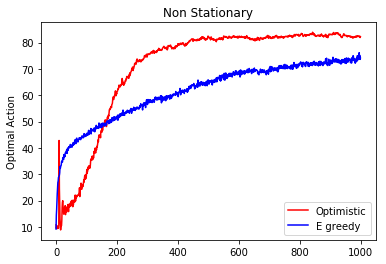

In [70]:
plt.figure()
plt.title("Non Stationary")
plt.ylabel("Optimal Action")
plt.plot(optimalActionStep_3, 'r', label='Optimistic')
plt.plot(optimalActionStep_4, 'b', label='E greedy')
plt.legend(loc='lower right')
plt.show()